<a href="https://colab.research.google.com/github/basanta11/fast_food/blob/main/Franchise_loc_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Fast Food Franchise Location Prediction in Sydney Using Geospatial and Machine Learning Analysi
"Identifying High-Potential Suburbs for New Outlets Based on Population Density, Competition, and Predictive Modeling"

*Note: The analysis in this notebook was conducted with specific variables for McDonald's as the franchise brand, considering competition from McDonald's, KFC, and Subway. The output identifies top potential suburbs based on a weighted score of population density and distance from existing McDonald's locations, filtered by minimum thresholds for density and distance which all can be changed in the notebook.*



In [ ]:
!pip install osmnx

In [ ]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import os

from geopy.geocoders import Nominatim
import time

# Set up geolocator for later use if needed (not used in this version but good to keep)
# geolocator = Nominatim(user_agent="fast_food_franchise_analysis")

**Cell 1:** Import all required libraries for geospatial analysis, data manipulation, and geocoding.

In [ ]:
ox.settings.log_console = False

tags = {"amenity": "fast_food", "name": ["McDonald's", "KFC", "Subway"]}

gdf = ox.features_from_place("Sydney, Australia", tags=tags)

**Cell 2:** Configure OSMnx settings, define tags for fast food venues, and download fast food locations in Sydney.

In [ ]:
columns_to_keep = ['name', 'geometry','brand','branch','addr:street']
df=gdf[columns_to_keep]

**Cell 3:** Select and keep only relevant columns from the downloaded fast food data.

In [ ]:
# # Visualize fast food locations on an interactive map

# df.explore(
#     column="name",  # Color points by name
#     tooltip=["name", "brand", "addr:street"],  # Show info on hover
#     marker_kwds={"radius": 6},  # Marker size
#     style_kwds={"fillOpacity": 0.7},
#     height=500,
#     width=800
# )

**Cell 4:** (Commented out) Example code for visualizing fast food locations on an interactive map.

In [ ]:
df.head()
brand="McDonald's"

**Cell 5:** Preview the fast food DataFrame and set the franchise brand to analyze (e.g., McDonald's).

In [ ]:
df['brand'].unique().tolist()


["McDonald's",
 nan,
 'Oporto',
 'KFC',
 'Subway',
 "Domino's",
 'Pepper Lunch',
 "Hungry Jack's",
 'Crust',
 'Krispy Kreme',
 'Red Rooster',
 "Betty's Burgers",
 "Domino's Pizza",
 'Guzman y Gomez',
 'Donut King',
 'Fishbowl',
 'Zambrero',
 "Grill'd",
 'El Jannah',
 'Schnitz',
 'Sumo Salad',
 'Hungry Jacks',
 'Soul Origin',
 "Roll'd",
 'Little Caesars',
 'Taco Bell',
 'Pizza Hut',
 'Five Guys',
 'Lord of the Fries',
 'Chicken Treat',
 'Potato Corner',
 'Saravanaa Bhavan',
 'I Love Pizza',
 'Pizza Inn',
 "Frango's",
 'Atlantic Fish & Chips',
 'Cinnabon']

**Cell 6:** List all unique fast food brands present in the data.

In [ ]:
test_filtered = df[df['brand'] == brand]
test_filtered.head()

name                     geometry       brand  \
element id                                                               
node    19127275   McDonald's  POINT (150.87202 -33.95549)  McDonald's   
        251268009  McDonald's   POINT (151.0015 -33.77399)  McDonald's   
        313691857  McDonald's   POINT (151.13063 -33.7835)  McDonald's   
        339290462  McDonald's  POINT (150.90315 -33.73001)  McDonald's   
        417231584  McDonald's     POINT (151.122 -33.9526)  McDonald's   

                     branch                       addr:street  
element id                                                     
node    19127275   Prestons  Cnr Camden Valley Way & Ash Road  
        251268009       NaN                               NaN  
        313691857       NaN                               NaN  
        339290462       NaN                               NaN  
        417231584       NaN                       Forest Road

In [ ]:
if test_filtered.crs.is_geographic:
    test_filtered = test_filtered.to_crs(epsg=3857)

test_filtered["geometry_centroid"] = test_filtered.geometry.centroid

test_filtered["geometry_centroid_latlon"] = (
    test_filtered["geometry_centroid"].to_crs(epsg=4326)
)

In [ ]:
!wget https://github.com/basanta11/fast_food/releases/download/update/SA2_2021_AUST_SHP_GDA2020.zip -O shapefile.zip


import os

!unzip shapefile.zip -d shapefile

sa2_gdf = gpd.read_file("shapefile/SA2_2021_AUST_GDA2020.shp")







sa2_nsw = sa2_gdf[sa2_gdf['STE_NAME21'] == 'New South Wales']

sa2 = sa2_nsw[sa2_nsw['GCC_NAME21'] == 'Greater Sydney']

--2025-07-16 14:03:25--  https://github.com/basanta11/fast_food/releases/download/update/SA2_2021_AUST_SHP_GDA2020.zip
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/1009131321/edc4be9e-47e6-4448-8112-9345ce26bbf7?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-07-16T14%3A40%3A18Z&rscd=attachment%3B+filename%3DSA2_2021_AUST_SHP_GDA2020.zip&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-07-16T13%3A40%3A08Z&ske=2025-07-16T14%3A40%3A18Z&sks=b&skv=2018-11-09&sig=0K3Ho%2BzoOz2%2Fn7SEVkDQBwd3%2BIgIq6Vk5dO4OIXQ%2BU8%3D&jwt=eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1MjY3NDkwNiwibmJmIjoxNzUyNjc0NjA2LCJwYXRoI

In [ ]:
sa2_nsw['SA3_NAME21'].unique().tolist()



['Queanbeyan',
 'Snowy Mountains',
 'South Coast',
 'Goulburn - Mulwaree',
 'Young - Yass',
 'Gosford',
 'Wyong',
 'Bathurst',
 'Lachlan Valley',
 'Lithgow - Mudgee',
 'Orange',
 'Clarence Valley',
 'Coffs Harbour',
 'Bourke - Cobar - Coonamble',
 'Broken Hill and Far West',
 'Dubbo',
 'Lower Hunter',
 'Maitland',
 'Port Stephens',
 'Upper Hunter',
 'Dapto - Port Kembla',
 'Illawarra Catchment Reserve',
 'Kiama - Shellharbour',
 'Wollongong',
 'Great Lakes',
 'Kempsey - Nambucca',
 'Lord Howe Island',
 'Port Macquarie',
 'Taree - Gloucester',
 'Albury',
 'Lower Murray',
 'Upper Murray exc. Albury',
 'Armidale',
 'Inverell - Tenterfield',
 'Moree - Narrabri',
 'Tamworth - Gunnedah',
 'Lake Macquarie - East',
 'Lake Macquarie - West',
 'Newcastle',
 'Richmond Valley - Coastal',
 'Richmond Valley - Hinterland',
 'Tweed Valley',
 'Griffith - Murrumbidgee (West)',
 'Tumut - Tumbarumba',
 'Wagga Wagga',
 'Shoalhaven',
 'Southern Highlands',
 'Baulkham Hills',
 'Dural - Wisemans Ferry',
 'Haw

In [ ]:
# sa2.explore(
#     column="SA2_NAME21",  # Color points by name
#     marker_kwds={"radius": 6},  # Marker size
#     style_kwds={"fillOpacity": 0.7},
#     height=500,
#     width=800
# )

In [ ]:
census_url="https://raw.githubusercontent.com/basanta11/fast_food/main/data/2021Census_G01_NSW_SA2.csv"
census_data = pd.read_csv(census_url)
census_data.head()

,SA2_CODE_2021,Tot_P_M,Tot_P_F,Tot_P_P,Age_0_4_yr_M,Age_0_4_yr_F,Age_0_4_yr_P,Age_5_14_yr_M,Age_5_14_yr_F,Age_5_14_yr_P,...,High_yr_schl_comp_Yr_8_belw_P,High_yr_schl_comp_D_n_g_sch_M,High_yr_schl_comp_D_n_g_sch_F,High_yr_schl_comp_D_n_g_sch_P,Count_psns_occ_priv_dwgs_M,Count_psns_occ_priv_dwgs_F,Count_psns_occ_priv_dwgs_P,Count_Persons_other_dwgs_M,Count_Persons_other_dwgs_F,Count_Persons_other_dwgs_P
0,101021007,2234,2117,4343,111,98,207,278,210,487,...,103,5,10,14,1979,1902,3878,288,251,535
1,101021008,4264,4255,8517,276,252,526,595,495,1088,...,366,21,27,43,3989,3961,7950,240,220,460
2,101021009,5704,5638,11342,318,349,669,551,516,1067,...,410,35,52,83,5264,5143,10410,476,467,943
3,101021010,2647,2440,5085,163,164,319,253,216,469,...,116,10,12,27,2462,2344,4800,188,111,302
4,101021012,6331,6413,12744,416,421,835,984,896,1878,...,258,11,0,18,6079,6188,12260,175,187,358


In [ ]:
sa2=sa2[['SA2_CODE21', 'SA2_NAME21', 'geometry']]
census = census_data[['SA2_CODE_2021', 'Tot_P_P']]
census['SA2_CODE21']= census['SA2_CODE_2021'].astype(str)

sa2 = sa2.merge(census, on='SA2_CODE21', how='left')
sa2.head()

/tmp/ipython-input-68-4005056382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census['SA2_CODE21']= census['SA2_CODE_2021'].astype(str)


,SA2_CODE21,SA2_NAME21,geometry,SA2_CODE_2021,Tot_P_P
0,102011028,Avoca Beach - Copacabana,"POLYGON ((151.41373 -33.46558, 151.41362 -33.4...",102011028,7513
1,102011029,Box Head - MacMasters Beach,"POLYGON ((151.37484 -33.50052, 151.37507 -33.5...",102011029,11042
2,102011030,Calga - Kulnura,"MULTIPOLYGON (((151.20449 -33.5328, 151.20448 ...",102011030,4716
3,102011031,Erina - Green Point,"POLYGON ((151.37194 -33.43698, 151.37288 -33.4...",102011031,14758
4,102011032,Gosford - Springfield,"POLYGON ((151.32349 -33.42779, 151.32342 -33.4...",102011032,21204


In [ ]:
sa2 = sa2.to_crs(epsg=3577)

sa2['area_km2'] = sa2['geometry'].area / 1e6
sa2['pop_density'] = sa2['Tot_P_P'] / sa2['area_km2']

In [ ]:
sa2.columns.to_list()

['SA2_CODE21',
 'SA2_NAME21',
 'geometry',
 'SA2_CODE_2021',
 'Tot_P_P',
 'area_km2',
 'pop_density']

In [ ]:
# Step 0: Make sure both GeoDataFrames are in the same projected CRS
if test_filtered.crs != sa2.crs:
    sa2 = sa2.to_crs(test_filtered.crs)

# Step 1: Define function to get closest polygon (row) from sa2
def get_nearest_suburb(point, suburbs_gdf):
    distances = suburbs_gdf.geometry.distance(point)
    return suburbs_gdf.loc[distances.idxmin()]

# Step 2: Apply the function to each centroid in test_filtered
# You can choose what attribute to extract (e.g., 'suburb_name', 'LGA_CODE', etc.)
test_filtered['nearest_suburb'] = test_filtered['geometry_centroid'].apply(
    lambda pt: get_nearest_suburb(pt, sa2)['SA2_NAME21']
)


In [ ]:
suburb_list=sa2.copy()
fast_food=test_filtered[['name','geometry','nearest_suburb','geometry_centroid']]

In [ ]:

suburb_list.columns.tolist()

['SA2_CODE21',
 'SA2_NAME21',
 'geometry',
 'SA2_CODE_2021',
 'Tot_P_P',
 'area_km2',
 'pop_density']

In [ ]:
suburb_counts = fast_food["nearest_suburb"].value_counts().reset_index()

suburb_counts.columns = ["suburb", "fast_food_count"]

display(suburb_counts)

,suburb,fast_food_count
0,Sydney Airport,5
1,Penrith,3
2,Blacktown (East) - Kings Park,3
3,Sydney (North) - Millers Point,3
4,St Marys - North St Marys,3
...,...,...
127,Wiley Park,1
128,Oran Park,1
129,Guildford West - Merrylands West,1
130,Windsor - Bligh Park,1


In [ ]:
suburb_list = suburb_list.merge(suburb_counts, left_on='SA2_NAME21', right_on='suburb', how="left")

suburb_list["fast_food_count"] = suburb_list["fast_food_count"].fillna(0).astype(int)

suburb_list = suburb_list.drop(columns=['suburb'])

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


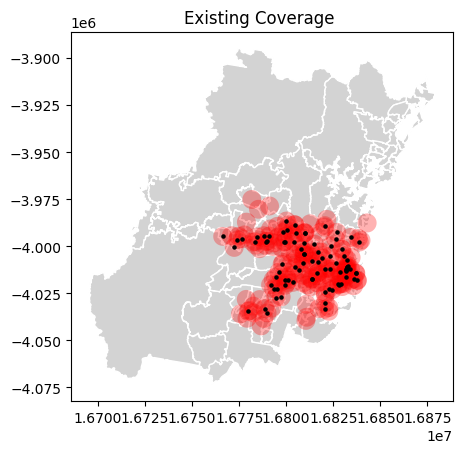

In [ ]:
import matplotlib.pyplot as plt

fast_food["buffer"] = fast_food.geometry.buffer(5000)

ax = suburb_list.plot(color='lightgrey', edgecolor='white')
fast_food.set_geometry("buffer").plot(ax=ax, color='red', alpha=0.3)
fast_food.set_geometry("geometry").plot(ax=ax, color='black', markersize=5)

plt.title("Existing Coverage ")
plt.show()

In [ ]:
import geopandas as gpd
from sklearn.preprocessing import MinMaxScaler

suburb_list_proj = suburb_list[['SA2_CODE21', 'SA2_NAME21', 'geometry', 'Tot_P_P', 'fast_food_count']].to_crs(epsg=3857).copy()
fast_food = fast_food.to_crs(suburb_list_proj.crs)

suburb_list_proj['centroid'] = suburb_list_proj.geometry.centroid

suburb_list_proj['min_dist_to_fastfood_km'] = suburb_list_proj['centroid'].apply(
    lambda x: fast_food.distance(x).min() / 1000  # convert to kilometers
)

suburb_list_proj.loc[:, 'area_km2'] = suburb_list_proj['geometry'].area / 1_000_000

suburb_list_proj.loc[:, 'pop_density'] = suburb_list_proj['Tot_P_P'] / suburb_list_proj['area_km2']



In [ ]:
subset = suburb_list[suburb_list['fast_food_count'] == 1]

# Summary stats for pop_density
stats = suburb_list['pop_density'].describe()  # includes count, mean, std, min, 25%, 50%, 75%, max

print(stats)

count      373.000000
mean      3163.156651
std       2875.911761
min          0.000000
25%       1184.505013
50%       2706.218708
75%       4145.542404
max      18432.887438
Name: pop_density, dtype: float64


In [ ]:
new_list = suburb_list_proj


scaler = MinMaxScaler()
new_list[['norm_density', 'norm_dist']] = scaler.fit_transform(
    new_list[['pop_density', 'min_dist_to_fastfood_km']]
)

new_list['location_score'] = (
    new_list['norm_density'] * 0.7 + new_list['norm_dist'] * 0.3
)

In [ ]:
stats = new_list['location_score'].describe()  # includes count, mean, std, min, 25%, 50%, 75%, max
print(stats)

count    373.000000
mean       0.145021
std        0.103967
min        0.002081
25%        0.074823
50%        0.126254
75%        0.181025
max        0.700000
Name: location_score, dtype: float64


In [ ]:
POP_DENSITY_THRESHOLD = 1000
DISTANCE_TO_MCD_THRESHOLD_KM = 2.0

candidate_suburbs = new_list[
    (new_list['pop_density'] > POP_DENSITY_THRESHOLD) &
    (new_list['min_dist_to_fastfood_km'] > DISTANCE_TO_MCD_THRESHOLD_KM)
]

top_areas = candidate_suburbs.sort_values(by='pop_density', ascending=False).head(3)
top_areas['Nearest_franchise_location(in km)']=top_areas['min_dist_to_fastfood_km']
top_areas['Suburb Name']=top_areas['SA2_NAME21']
top_areas['Population density']=top_areas['pop_density']
top_areas[['Suburb Name', 'Population density', 'Nearest_franchise_location(in km)', 'location_score']]

,Suburb Name,Population density,Nearest_franchise_location(in km),location_score
226,Dee Why - North,5901.884882,2.024069,0.333122
102,Bondi Beach - North Bondi,5784.281689,2.932003,0.330055
140,Campsie - South,5557.380059,2.384850,0.315456


In [ ]:
!pip install contextily
!pip install adjustText

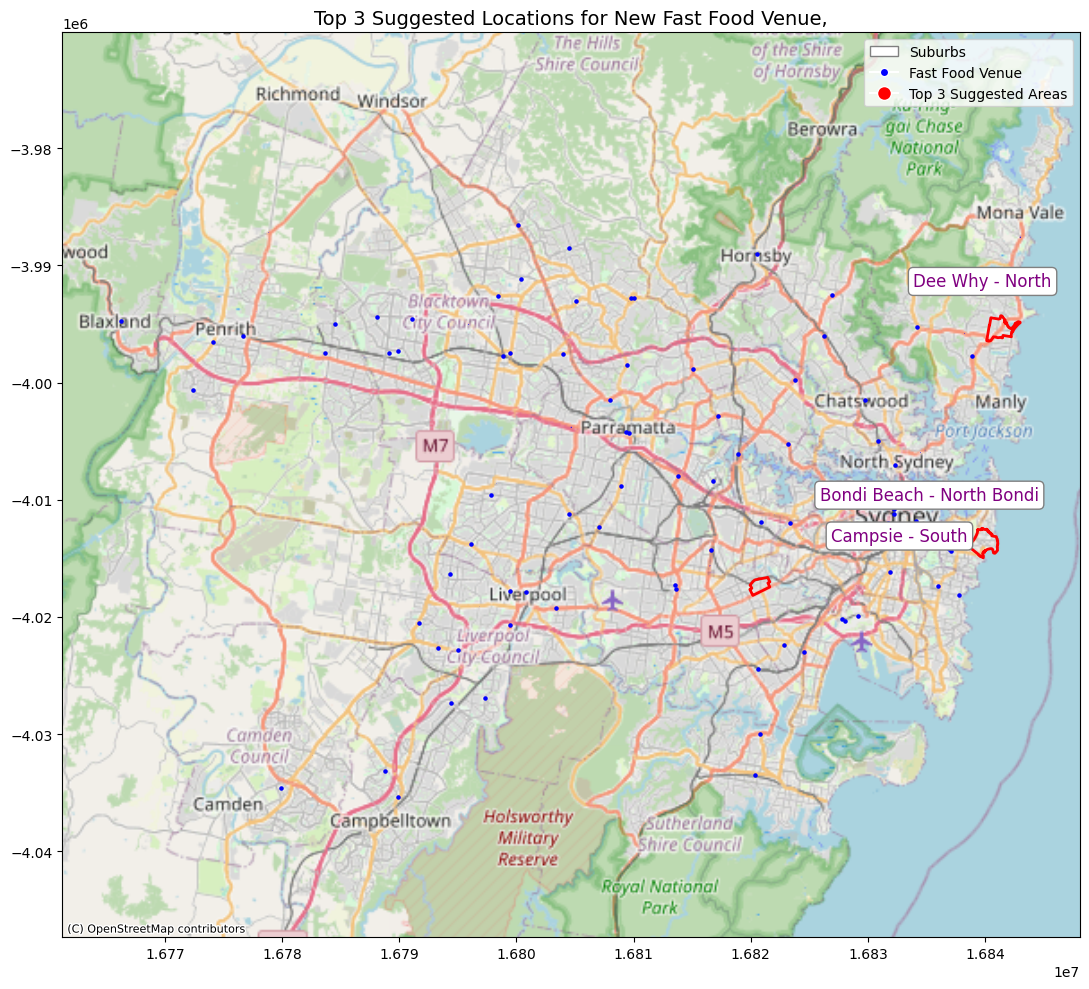

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from adjustText import adjust_text


top_areas_wm = top_areas.to_crs(epsg=3857)
fast_food_wm = fast_food.to_crs(epsg=3857)
suburb_list_wm = suburb_list.to_crs(epsg=3857)

combined = pd.concat([fast_food_wm[['geometry']], top_areas_wm[['geometry']]], ignore_index=True)

minx, miny, maxx, maxy = combined.total_bounds
zoom_margin = 5000
xlim = (minx - zoom_margin, maxx + zoom_margin)
ylim = (miny - zoom_margin, maxy + zoom_margin)

fig, ax = plt.subplots(figsize=(12, 10))

# suburb_list_wm.plot(ax=ax, facecolor='white', edgecolor='grey', linewidth=0.5)

fast_food_wm.plot(ax=ax, color='blue', markersize=5)

top_areas.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=2)

texts = []
for idx, row in top_areas.iterrows():
    texts.append(
         plt.text(
                row.geometry.centroid.x + 5000 ,
                row.geometry.centroid.y + 5000,
                row['SA2_NAME21'],
                fontsize=12, color='purple', ha='left', va='center',
                bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3')
            )
    )

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

ax.set_xlim(xlim)
ax.set_ylim(ylim)

cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)

legend_elements = [
    Patch(facecolor='white', edgecolor='grey', label='Suburbs'),
    Line2D([0], [0], marker='o', color='w', label='Fast Food Venue', markerfacecolor='blue', markersize=6),
    Line2D([0], [0], marker='o', color='w', label='Top 3 Suggested Areas', markerfacecolor='red', markersize=10)
]
ax.legend(handles=legend_elements)

ax.set_title(f"Top {len(top_areas)} Suggested Locations for New Fast Food Venue,", fontsize=14)
plt.tight_layout()
plt.show()